In [1]:
# Pythonもモジュールを読み込み
import numpy as np # 数値計算ライブラリ
from scipy.integrate import odeint # 常微分方程式を解くライブラリ
import matplotlib.pyplot as plt # 描画ライブラリ

In [2]:
# 二体問題の運動方程式
def func_twobody(x, t):
	GM = 1.327e11 # 万有引力定数×中心天体の質量, km^3/s^(-2)
	r_norm = np.sqrt(x[0]**2 + x[1]**2)	
	dxdt = [x[2], 
					x[3], 
					-GM*x[0]/(r_norm**3),
					-GM*x[1]/(r_norm**3)]
	return dxdt

In [3]:
# N体問題の運動方程式
def func_nbody(x, t):
	# 条件設定
	GM = 1.327e11 # 万有引力定数×太陽の質量, km^3/s^(-2)
	GM1 = 3.986e5 # 万有引力定数×地球の質量, km^3/s^(-2)
	theta1 = 0*(np.pi/180) # 0degと設定, deg -> rad
	period1 = 365*24*60*60 # 地球の軌道周期, sec
	a1 = 149597870.7 # 地球の軌道長半径, km
	
	# 地球の位置
	r1 = np.array([ a1*np.cos(2*np.pi*t/period1 + theta1), a1*np.sin(2*np.pi*t/period1 + theta1) ])
	
	# 運動方程式の計算
	d1 = x[0:2] - r1
	r_norm = np.sqrt(x[0]**2 + x[1]**2)	
	d1_norm = np.sqrt(d1[0]**2 + d1[1]**2)
	
	if d1_norm < 6371: #　地球距離が地球半径以下になると衝突してしまうため、エラーを返す
		print("ERROR: 地球スイングバイ時の高度がマイナスです！")
	
	dxdt = [x[2], 
					x[3], 
					-GM*x[0]/(r_norm**3) - GM1*d1[0]/(d1_norm**3),
					-GM*x[1]/(r_norm**3) - GM1*d1[1]/(d1_norm**3)]
	
	return dxdt

In [4]:
# 条件の設定
r_earth = 149597870.7 # 地球の公転軌道半径, km
v_earth = np.sqrt(1.327e11/r_earth) # 地球の公転速度, km/s
vinf = 5 # 地球公転速度に対する相対速度V∞, km/s
v_sc_x = np.sqrt(4*v_earth**2-vinf**2)*vinf/(2*v_earth) # 探査機の公転速度のx成分, km/s
v_sc_y = (2*v_earth**2 - vinf**2)/(2*v_earth) # 探査機の公転速度のy成分, km/s

In [5]:
# 0年〜0.2年の間の軌道伝播（二体問題）
x0 = np.array([r_earth, 0.0, -v_sc_x, v_sc_y]) # 位置, 速度, km, km/s
t_span = np.linspace(0,0.2*365*24*60*60,200) # 0.2年分を200ステップで刻む
sol_0to1 = odeint(func_twobody, x0, t_span)

In [6]:
# 0.2年〜2年の間の軌道伝播（N体問題）
x1 = sol_0to1[-1,:] + [0,0,0.0055,0] # 軌道伝播された位置・速度に軌道制御(ΔV)を加える
t_span1 = np.linspace(0.2*365*24*60*60,2*365*24*60*60,200) # 0.2年〜2年分を200ステップで刻む
sol_1to2 = odeint(func_nbody, x1, t_span1)

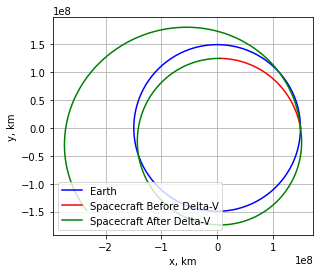

In [7]:
# 軌道の描画
theta = np.linspace(0,2*np.pi,100)
plt.plot(r_earth*np.cos(theta),r_earth*np.sin(theta),'b', label="Earth") # 地球の軌道
plt.plot(sol_0to1[:, 0],sol_0to1[:, 1], 'r', label="Spacecraft Before Delta-V")
plt.plot(sol_1to2[:, 0],sol_1to2[:, 1], 'g', label="Spacecraft After Delta-V")
plt.grid() # 格子をつける
plt.legend(loc="lower left")
plt.gca().set_aspect('equal') # グラフのアスペクト比を揃える
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.show()